In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os 
import scipy
import numpy as np
from scipy import signal 
import pandas as pd
import matplotlib.pyplot as plt
sample_rate=256


In [ ]:
file_wk_attention="/content/drive/MyDrive/BrainLink/BrainLink/WK/wk_attention.csv"
file_wk_relaxation="/content/drive/MyDrive/BrainLink/BrainLink/WK/wk_relaxation.csv"
file_wk_delta="/content/drive/MyDrive/BrainLink/BrainLink/WK/wk_delta.csv"
file_wk_theta="/content/drive/MyDrive/BrainLink/BrainLink/WK/wk_theta.csv"
file_wk_lowalpha="/content/drive/MyDrive/BrainLink/BrainLink/WK/wk_lowalpha.csv"
file_wk_highalpha="/content/drive/MyDrive/BrainLink/BrainLink/WK/wk_highalpha.csv"
file_wk_lowbeta="/content/drive/MyDrive/BrainLink/BrainLink/WK/wk_lowbeta.csv"
file_wk_highbeta="/content/drive/MyDrive/BrainLink/BrainLink/WK/wk_highbeta.csv"
file_wk_lowgamma="/content/drive/MyDrive/BrainLink/BrainLink/WK/wk_lowgamma.csv"
file_wk_midgamma="/content/drive/MyDrive/BrainLink/BrainLink/WK/wk_midgamma.csv"

file_fat_attention="/content/drive/MyDrive/BrainLink/BrainLink/FAT/fat_attention.csv"
file_fat_relaxation="/content/drive/MyDrive/BrainLink/BrainLink/FAT/fat_relaxation.csv"
file_fat_delta="/content/drive/MyDrive/BrainLink/BrainLink/FAT/fat_delta.csv"
file_fat_theta="/content/drive/MyDrive/BrainLink/BrainLink/FAT/fat_theta.csv"
file_fat_lowalpha="/content/drive/MyDrive/BrainLink/BrainLink/FAT/fat_lowalpha.csv"
file_fat_highalpha="/content/drive/MyDrive/BrainLink/BrainLink/FAT/fat_highalpha.csv"
file_fat_lowbeta="/content/drive/MyDrive/BrainLink/BrainLink/FAT/fat_lowbeta.csv"
file_fat_highbeta="/content/drive/MyDrive/BrainLink/BrainLink/FAT/fat_highbeta.csv"
file_fat_lowgamma="/content/drive/MyDrive/BrainLink/BrainLink/FAT/fat_lowgamma.csv"
file_fat_midgamma="/content/drive/MyDrive/BrainLink/BrainLink/FAT/fat_midgamma.csv"

In [ ]:
seg_data=pd.read_csv(file_fat_attention)
seg_datanp=np.transpose(seg_data.to_numpy())
print(seg_datanp)

[[ 64.  66.  74. ...  nan  nan  nan]
 [ 48.  37.  37. ...  nan  nan  nan]
 [ 69.  51.  54. ...  nan  nan  nan]
 ...
 [ 40.  47.  57. ...  nan  nan  nan]
 [ 63.  63.  56. ...  69.  69.  69.]
 [100. 100. 100. ...  nan  nan  nan]]


In [ ]:
def cut_file(file_name,file_path,state):
  pddata_all=pd.read_csv(file_path)
  data_all=np.transpose(pddata_all.to_numpy())
  data_open1=np.zeros((8,120))
  data_close2=np.zeros((8,120))
  data_open3=np.zeros((8,120))
  for i in range(0,8):
    data_open1[i]=data_all[i][120:240]
    data_close2[i]=data_all[i][390:510]
    data_open3[i]=data_all[i][660:780]
    data_open1_ave=np.zeros(8*24)
    data_close2_ave=np.zeros(8*24)
    data_open3_ave=np.zeros(8*24)
    k=0
  for i in range(0,8):
    for j in range(0,24):
      data_open1_ave[k]=np.mean(data_open1[i][j*5:(j+1)*5])
      data_close2_ave[k]=np.mean(data_close2[i][j*5:(j+1)*5])
      data_open3_ave[k]=np.mean(data_open3[i][j*5:(j+1)*5])
      k=k+1
 
  return data_open1_ave,data_close2_ave,data_open3_ave

In [ ]:
def get_2min(file_name,file_path,state):
  pddata_all=pd.read_csv(file_path)
  data_all=np.transpose(pddata_all.to_numpy())
  data_open1=np.zeros((8,120))
  data_close2=np.zeros((8,120))
  data_open3=np.zeros((8,120))
  for i in range(0,8):
    data_open1[i]=data_all[i][120:240]
    data_close2[i]=data_all[i][390:510]
    data_open3[i]=data_all[i][660:780]
  data_open1_ave=np.zeros(120)
  data_close2_ave=np.zeros(120)
  data_open3_ave=np.zeros(120)
  for i in range(0,120):
    data_open1_ave[i]=(data_open1[0][i]+data_open1[1][i]+data_open1[2][i]+data_open1[3][i]
             +data_open1[4][i]+data_open1[5][i]+data_open1[6][i]+data_open1[7][i])/8
    data_close2_ave[i]=(data_close2[0][i]+data_close2[1][i]+data_close2[2][i]+data_close2[3][i]
             +data_close2[4][i]+data_close2[5][i]+data_close2[6][i]+data_close2[7][i])/8
    data_open3_ave[i]=(data_open3[0][i]+data_open3[1][i]+data_open3[2][i]+data_open3[3][i]
             +data_open3[4][i]+data_open3[5][i]+data_open3[6][i]+data_open3[7][i])/8

  return data_open1_ave,data_close2_ave,data_open3_ave

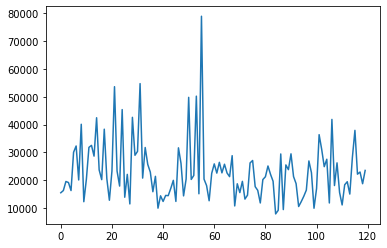

In [ ]:
fat_lowalpha_open1_ave,fat_lowalpha_close2_ave,fat_lowalpha_open3_ave=get_2min("fat_lowalpha.csv",file_fat_lowalpha,"fat")
fat_highalpha_open1_ave,fat_highalpha_close2_ave,fat_highalpha_open3_ave=get_2min("fat_highalpha.csv",file_fat_highalpha,"fat")
fat_lowbeta_open1_ave,fat_lowbeta_close2_ave,fat_lowbeta_open3_ave=get_2min("fat_lowbeta.csv",file_fat_lowbeta,"fat")
fat_highbeta_open1_ave,fat_highbeta_close2_ave,fat_highbeta_open3_ave=get_2min("fat_highbeta.csv",file_fat_highbeta,"fat")
fat_lowgamma_open1_ave,fat_lowgamma_close2_ave,fat_lowgamma_open3_ave=get_2min("fat_lowgamma.csv",file_fat_lowgamma,"fat")
fat_midgamma_open1_ave,fat_midgamma_close2_ave,fat_midgamma_open3_ave=get_2min("fat_midgamma.csv",file_fat_midgamma,"fat")

wk_lowalpha_open1_ave,wk_lowalpha_close2_ave,wk_lowalpha_open3_ave=get_2min("wk_lowalpha.csv",file_wk_lowalpha,"fat")
wk_highalpha_open1_ave,wk_highalpha_close2_ave,wk_highalpha_open3_ave=get_2min("wk_highalpha.csv",file_wk_highalpha,"fat")
wk_lowbeta_open1_ave,wk_lowbeta_close2_ave,wk_lowbeta_open3_ave=get_2min("wk_lowbeta.csv",file_wk_lowbeta,"fat")
wk_highbeta_open1_ave,wk_highbeta_close2_ave,wk_highbeta_open3_ave=get_2min("wk_highbeta.csv",file_wk_highbeta,"fat")
wk_lowgamma_open1_ave,wk_lowgamma_close2_ave,wk_lowgamma_open3_ave=get_2min("wk_lowgamma.csv",file_wk_lowgamma,"fat")
wk_midgamma_open1_ave,wk_midgamma_close2_ave,wk_midgamma_open3_ave=get_2min("wk_midgamma.csv",file_wk_midgamma,"fat")


plt.plot(fat_lowalpha_open1_ave)


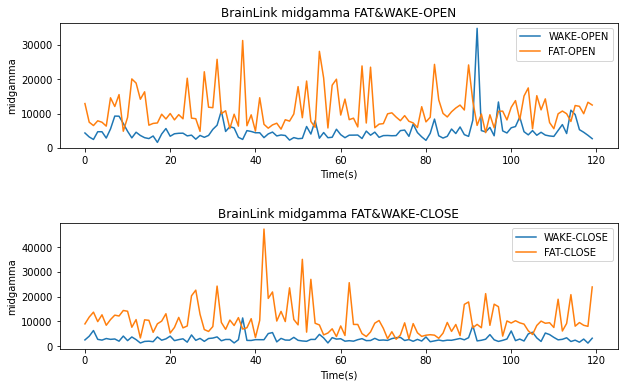

In [ ]:
i="midgamma"

x=np.arange(0,120,1)  
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10, 6))
plt.subplots_adjust(hspace=0.6)
ax1.set_title("BrainLink "+i+" FAT&WAKE-OPEN")
ax1.plot(x,wk_midgamma_open1_ave,label='WAKE-OPEN')
ax1.plot(x,fat_midgamma_open1_ave,label='FAT-OPEN')
ax1.set_xlabel("Time(s)")
ax1.set_ylabel(i)
ax1.legend()

ax2.set_title("BrainLink "+i+" FAT&WAKE-CLOSE")
ax2.plot(x,wk_midgamma_close2_ave,label='WAKE-CLOSE')
ax2.plot(x,fat_midgamma_close2_ave,label='FAT-CLOSE')
ax2.set_xlabel("Time(s)")
ax2.set_ylabel(i)
ax2.legend()

In [ ]:
fat_attention_open1_ave,fat_attention_close2_ave,fat_attention_open3_ave=cut_file("fat_attention.csv",file_fat_attention,"fat")
fat_relaxation_open1_ave,fat_relaxation_close2_ave,fat_relaxation_open3_ave=cut_file("fat_relaxation.csv",file_fat_relaxation,"fat")
fat_delta_open1_ave,fat_delta_close2_ave,fat_delta_open3_ave=cut_file("fat_delta.csv",file_fat_delta,"fat")
fat_theta_open1_ave,fat_theta_close2_ave,fat_theta_open3_ave=cut_file("fat_theta.csv",file_fat_theta,"fat")
fat_lowalpha_open1_ave,fat_lowalpha_close2_ave,fat_lowalpha_open3_ave=cut_file("fat_lowalpha.csv",file_fat_lowalpha,"fat")
fat_highalpha_open1_ave,fat_highalpha_close2_ave,fat_highalpha_open3_ave=cut_file("fat_highalpha.csv",file_fat_highalpha,"fat")
fat_lowbeta_open1_ave,fat_lowbeta_close2_ave,fat_lowbeta_open3_ave=cut_file("fat_lowbeta.csv",file_fat_lowbeta,"fat")
fat_highbeta_open1_ave,fat_highbeta_close2_ave,fat_highbeta_open3_ave=cut_file("fat_highbeta.csv",file_fat_highbeta,"fat")
fat_lowgamma_open1_ave,fat_lowgamma_close2_ave,fat_lowgamma_open3_ave=cut_file("fat_lowgamma.csv",file_fat_lowgamma,"fat")
fat_midgamma_open1_ave,fat_midgamma_close2_ave,fat_midgamma_open3_ave=cut_file("fat_midgamma.csv",file_fat_midgamma,"fat")

wk_attention_open1_ave,wk_attention_close2_ave,wk_attention_open3_ave=cut_file("wk_attention.csv",file_wk_attention,"fat")
wk_relaxation_open1_ave,wk_relaxation_close2_ave,wk_relaxation_open3_ave=cut_file("wk_relaxation.csv",file_wk_relaxation,"fat")
wk_delta_open1_ave,wk_delta_close2_ave,wk_delta_open3_ave=cut_file("wk_delta.csv",file_wk_delta,"fat")
wk_theta_open1_ave,wk_theta_close2_ave,wk_theta_open3_ave=cut_file("wk_theta.csv",file_wk_theta,"fat")
wk_lowalpha_open1_ave,wk_lowalpha_close2_ave,wk_lowalpha_open3_ave=cut_file("wk_lowalpha.csv",file_wk_lowalpha,"fat")
wk_highalpha_open1_ave,wk_highalpha_close2_ave,wk_highalpha_open3_ave=cut_file("wk_highalpha.csv",file_wk_highalpha,"fat")
wk_lowbeta_open1_ave,wk_lowbeta_close2_ave,wk_lowbeta_open3_ave=cut_file("wk_lowbeta.csv",file_wk_lowbeta,"fat")
wk_highbeta_open1_ave,wk_highbeta_close2_ave,wk_highbeta_open3_ave=cut_file("wk_highbeta.csv",file_wk_highbeta,"fat")
wk_lowgamma_open1_ave,wk_lowgamma_close2_ave,wk_lowgamma_open3_ave=cut_file("wk_lowgamma.csv",file_wk_lowgamma,"fat")
wk_midgamma_open1_ave,wk_midgamma_close2_ave,wk_midgamma_open3_ave=cut_file("wk_midgamma.csv",file_wk_midgamma,"fat")

wk_deltatheta_open1_ave=wk_delta_open1_ave/wk_theta_open1_ave
wk_deltatheta_open3_ave=wk_delta_open3_ave/wk_theta_open3_ave
wk_deltatheta_close2_ave=wk_delta_close2_ave/wk_theta_close2_ave

fat_deltatheta_open1_ave=fat_delta_open1_ave/fat_theta_open1_ave
fat_deltatheta_open3_ave=fat_delta_open3_ave/fat_theta_open3_ave
fat_deltatheta_close2_ave=fat_delta_close2_ave/fat_theta_close2_ave




NameError: ignored

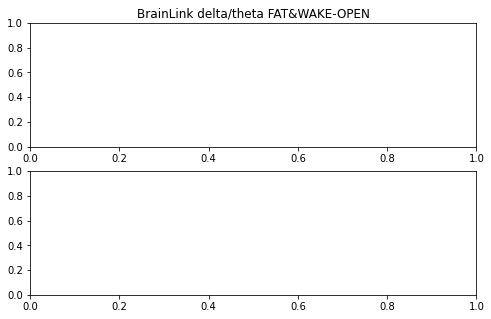

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(8,5))
  
 
 # plt.subplot(121)
  #plt.hist(SPWK[i], 432)
  #plt.subplot(122)
  #plt.hist(SPSL[i], 432)
ax1.set_title("BrainLink delta/theta FAT&WAKE-OPEN")
ax1.hist([fat_deltatheta_open1_ave,wk_deltatheta_open1_ave],50,histtype='bar',label=['FAT-OPEN','WAKE-OPEN'])
ax1.set_ylabel("Probability")
ax1.set_xlabel("delta/theta")
# ax1.hist(WKO[i],100,label='WAKE-OPEN')
ax1.legend()
ax2.set_title("BrainLink delta/theta FAT&WAKE-CLOSE")
ax2.hist([fat_deltatheta_close2_ave,wk_deltatheta_close2_ave],50,histtype='bar',label=['FAT-CLOSE','WAKE-CLOSE'])
ax2.set_ylabel("Probability")
ax2.set_xlabel("delta/theta")
#ax2.hist(WKC[i],100,label='WAKE-CLOSE')
#print(SP_trans[i])
ax2.legend()
plt.subplots_adjust(hspace=0.6)
print()
print()
plt.show()


fat_theta_open1_ave,fat_theta_close2_ave,fat_theta_open3_ave=cut_file("fat_theta.csv",file_fat_theta,"fat")
fat_lowalpha_open1_ave,fat_lowalpha_close2_ave,fat_lowalpha_open3_ave=cut_file("fat_lowalpha.csv",file_fat_lowalpha,"fat")
fat_highalpha_open1_ave,fat_highalpha_close2_ave,fat_highalpha_open3_ave=cut_file("fat_highalpha.csv",file_fat_highalpha,"fat")
fat_lowbeta_open1_ave,fat_lowbeta_close2_ave,fat_lowbeta_open3_ave=cut_file("fat_lowbeta.csv",file_fat_lowbeta,"fat")
fat_highbeta_open1_ave,fat_highbeta_close2_ave,fat_highbeta_open3_ave=cut_file("fat_highbeta.csv",file_fat_highbeta,"fat")
fat_lowgamma_open1_ave,fat_lowgamma_close2_ave,fat_lowgamma_open3_ave=cut_file("fat_lowgamma.csv",file_fat_lowgamma,"fat")
fat_midgamma_open1_ave,fat_midgamma_close2_ave,fat_midgamma_open3_ave=cut_file("fat_midgamma.csv",file_fat_midgamma,"fat")

In [ ]:
attention=np.hstack((wk_attention_open1_ave,wk_attention_close2_ave,fat_attention_open1_ave,fat_attention_close2_ave))
relaxation=np.hstack((wk_relaxation_open1_ave,wk_relaxation_close2_ave,fat_relaxation_open1_ave,fat_relaxation_close2_ave))
delta=np.hstack((wk_delta_open1_ave,wk_delta_close2_ave,fat_delta_open1_ave,fat_delta_close2_ave))
theta=np.hstack((wk_theta_open1_ave,wk_theta_close2_ave,fat_theta_open1_ave,fat_theta_close2_ave))
lowalpha=np.hstack((wk_lowalpha_open1_ave,wk_lowalpha_close2_ave,fat_lowalpha_open1_ave,fat_lowalpha_close2_ave))
highalpha=np.hstack((wk_highalpha_open1_ave,wk_highalpha_close2_ave,fat_highalpha_open1_ave,fat_highalpha_close2_ave))
lowbeta=np.hstack((wk_lowbeta_open1_ave,wk_lowbeta_close2_ave,fat_lowbeta_open1_ave,fat_lowbeta_close2_ave))
highbeta=np.hstack((wk_highbeta_open1_ave,wk_highbeta_close2_ave,fat_highbeta_open1_ave,fat_highbeta_close2_ave))
lowgamma=np.hstack((wk_lowgamma_open1_ave,wk_lowgamma_close2_ave,fat_lowgamma_open1_ave,fat_lowgamma_close2_ave))
midgamma=np.hstack((wk_midgamma_open1_ave,wk_midgamma_close2_ave,fat_midgamma_open1_ave,fat_midgamma_close2_ave))
deltatheta=np.hstack((wk_deltatheta_open1_ave,wk_deltatheta_close2_ave,fat_deltatheta_open1_ave,fat_deltatheta_close2_ave))


In [ ]:
KSSW=np.ones(8*2*24)
KSSF=np.zeros(8*2*24)
KSS=np.hstack((KSSW,KSSF))
print(KSS.shape)

(768,)


In [ ]:
#Sp=np.transpose(np.vstack((attention,relaxation,delta,theta,lowalpha,highalpha,lowbeta,highbeta,lowgamma,midgamma,deltatheta)))
Sp=np.transpose(np.vstack((attention,relaxation,theta,lowalpha,highalpha,lowbeta,highbeta,lowgamma,midgamma,deltatheta)))
print(Sp.shape)


(384, 10)


In [ ]:
attention=np.hstack((wk_attention_close2_ave,fat_attention_close2_ave))
relaxation=np.hstack((wk_relaxation_close2_ave,fat_relaxation_close2_ave))
delta=np.hstack((wk_delta_close2_ave,fat_delta_close2_ave))
theta=np.hstack((wk_theta_close2_ave,fat_theta_close2_ave))
lowalpha=np.hstack((wk_lowalpha_close2_ave,fat_lowalpha_close2_ave))
highalpha=np.hstack((wk_highalpha_close2_ave,fat_highalpha_close2_ave))
lowbeta=np.hstack((wk_lowbeta_close2_ave,fat_lowbeta_close2_ave))
highbeta=np.hstack((wk_highbeta_close2_ave,fat_highbeta_close2_ave))
lowgamma=np.hstack((wk_lowgamma_close2_ave,fat_lowgamma_close2_ave))
midgamma=np.hstack((wk_midgamma_close2_ave,fat_midgamma_close2_ave))
deltatheta=np.hstack((wk_deltatheta_close2_ave,fat_deltatheta_close2_ave))

In [ ]:
#SpC=np.transpose(np.vstack((attention,relaxation,delta,theta,lowalpha,highalpha,lowbeta,highbeta,lowgamma,midgamma,deltatheta)))
SpC=np.transpose(attention)
print(SpC.shape)

(384,)


In [ ]:
KSSW=np.ones(8*24)
KSSF=np.zeros(8*24)
KSS=np.hstack((KSSW,KSSF))
print(KSS.shape)

(384,)


In [ ]:
attention=np.hstack((wk_attention_open1_ave,fat_attention_open1_ave))
relaxation=np.hstack((wk_relaxation_open1_ave,fat_relaxation_open1_ave))
delta=np.hstack((wk_delta_open1_ave,fat_delta_open1_ave))
theta=np.hstack((wk_theta_open1_ave,fat_theta_open1_ave))
lowalpha=np.hstack((wk_lowalpha_open1_ave,fat_lowalpha_open1_ave))
highalpha=np.hstack((wk_highalpha_open1_ave,fat_highalpha_open1_ave))
lowbeta=np.hstack((wk_lowbeta_open1_ave,fat_lowbeta_open1_ave))
highbeta=np.hstack((wk_highbeta_open1_ave,fat_highbeta_open1_ave))
lowgamma=np.hstack((wk_lowgamma_open1_ave,fat_lowgamma_open1_ave))
midgamma=np.hstack((wk_midgamma_open1_ave,fat_midgamma_open1_ave))
deltatheta=np.hstack((wk_deltatheta_open1_ave,fat_deltatheta_open1_ave))

In [ ]:
SpO=np.transpose(attention)
#SpO=np.transpose(np.vstack((attention,relaxation,lowalpha,highalpha,lowbeta,highbeta,lowgamma,midgamma,deltatheta)))
print(SpO.shape)

(384,)


In [ ]:
x = SpO.reshape(-1,1)

y = KSS
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import RepeatedKFold
average_acc = 0.0
kf = RepeatedKFold(n_splits=10, n_repeats=2)
acc = np.zeros(20)
index = 0
for train_index, test_index in kf.split(x):
 train_X= x[train_index]
 train_y =y[train_index]
 test_X, test_y = x[test_index], y[test_index]
 regr = make_pipeline(StandardScaler(), SVC())
 regr.fit(train_X, train_y)
 y_pred = regr.predict(test_X)
 print(accuracy_score(test_y, y_pred))
 acc[index] = accuracy_score(test_y, y_pred)
 index = index + 1
print()
print("BrainLink OPEN average_acc:", np.mean(acc), "std_acc:", 
np.std(acc))

0.6153846153846154
0.5384615384615384
0.4358974358974359
0.5897435897435898
0.6052631578947368
0.5263157894736842
0.5263157894736842
0.4473684210526316
0.47368421052631576
0.42105263157894735
0.5384615384615384
0.5641025641025641
0.48717948717948717
0.46153846153846156
0.47368421052631576
0.42105263157894735
0.47368421052631576
0.631578947368421
0.47368421052631576
0.631578947368421

BrainLink OPEN average_acc: 0.5168016194331984 std_acc: 0.06842481230703555


In [ ]:
wk_open1_attention=[]
wk_open3_attention=[]
wk_close2_attention=[]
fat_open1_attention=[]
fat_close2_attention=[]
fat_open3_attention=[]

wk_open1_relaxation=[]
wk_open3_relaxation=[]
wk_close2_relaxation=[]
fat_open1_relaxation=[]
fat_close2_relaxation=[]
fat_open3_relaxation=[]

wk_open1_delta=[]
wk_open3_delta=[]
wk_close2_delta=[]
fat_open1_delta=[]
fat_close2_delta=[]
fat_open3_delta=[]

wk_open1_delta=[]
wk_open3_delta=[]
wk_close2_delta=[]
fat_open1_delta=[]
fat_close2_delta=[]
fat_open3_delta=[]

